In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("veriler.csv")
df.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [3]:
df.shape

(22, 5)

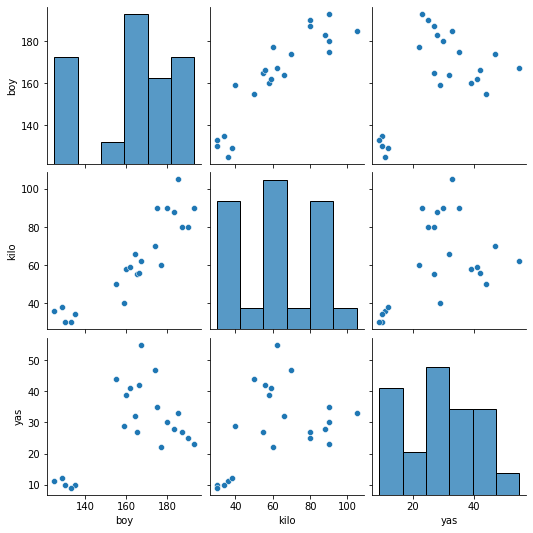

In [4]:
sns.pairplot(df);

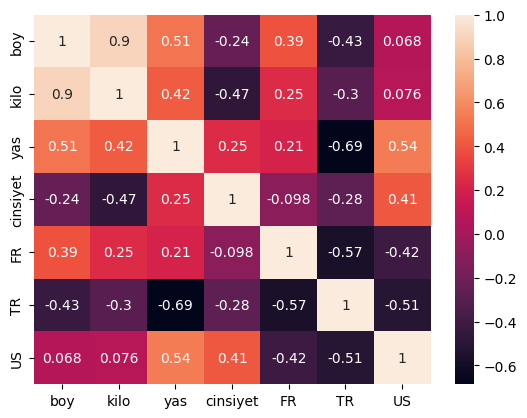

In [37]:
sns.heatmap(df.corr() , annot = True);

In [5]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [6]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [7]:
df["cinsiyet"] = le.fit_transform(df["cinsiyet"])

In [8]:
df.tail()

,ulke,boy,kilo,yas,cinsiyet
17,fr,187,80,27,0
18,fr,183,88,28,0
19,fr,159,40,29,1
20,fr,164,66,32,1
21,fr,166,56,42,1


In [9]:
ulkeOhe = ohe.fit_transform(df["ulke"].values.reshape(-1,1)).toarray()    # ulkeOhe = ohe.fit_transform(df.iloc[:,0:1].values).toarray()

In [10]:
# ulkeDummie = pd.get_dummies(df["ulke"]) this is alternative.

In [11]:
ulkeDF = pd.DataFrame(ulkeOhe , columns=["FR","TR","US"])
ulkeDF

,FR,TR,US
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [12]:
df = pd.concat([df , ulkeDF] , axis = 1)

In [13]:
df.drop("ulke",axis = 1 , inplace=True)

In [14]:
df.head()

,boy,kilo,yas,cinsiyet,FR,TR,US
0,130,30,10,0,0.0,1.0,0.0
1,125,36,11,0,0.0,1.0,0.0
2,135,34,10,1,0.0,1.0,0.0
3,133,30,9,1,0.0,1.0,0.0
4,129,38,12,0,0.0,1.0,0.0


In [15]:
#df = df.iloc[: , [3,0,1,2,4,5,6]]
#df

## Train-Test-Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop("boy" , axis = 1)
y = df["boy"]

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.3 , random_state = 53)

## Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)

In [22]:
X_test_scaled = scaler.transform(X_test)

## Modeling

In [23]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso

In [24]:
lr = LinearRegression()
rdg = Ridge()
las = Lasso()

In [25]:
lr.fit(X_train_scaled , y_train)
rdg.fit(X_train_scaled , y_train)
las.fit(X_train_scaled , y_train)

Lasso()

In [26]:
lr_y_pred = lr.predict(X_test_scaled)
rdg_y_pred = rdg.predict(X_test_scaled)
las_y_pred = las.predict(X_test_scaled)

## Model Performance

In [27]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.model_selection import cross_validate , cross_val_score # I didin't use it. Because our data is too small.

In [28]:
r2_lr = r2_score(y_test , lr_y_pred) 
r2_rdg = r2_score(y_test , rdg_y_pred) 
r2_las = r2_score(y_test , las_y_pred) 

print(f""" Our Linear r2 : {r2_lr} , Ridge r2 : {r2_rdg}  , Lasso r2 : {r2_las}""")

 Our Linear r2 : 0.7762492250167872 , Ridge r2 : 0.423490295986388  , Lasso r2 : 0.7040720293232181


In [29]:
mae_lr = mean_absolute_error(y_test , lr_y_pred) 
mae_rdg = mean_absolute_error(y_test , rdg_y_pred) 
mae_las = mean_absolute_error(y_test , las_y_pred) 

print(f""" Our Linear mae : {mae_lr} , Ridge mae: {mae_rdg}  , Lasso mae : {mae_las}""")

 Our Linear mae : 5.939851415472849 , Ridge mae: 7.923976269864852  , Lasso mae : 6.219484704081785


## Backward Elimination

In [30]:
import statsmodels.api as sm

In [31]:
X = np.append(arr = np.ones((len(df) , 1)).astype("int64") , values = df , axis = 1) # We add +1 intercept at 0.index column.

In [32]:
X

array([[  1., 130.,  30.,  10.,   0.,   0.,   1.,   0.],
       [  1., 125.,  36.,  11.,   0.,   0.,   1.,   0.],
       [  1., 135.,  34.,  10.,   1.,   0.,   1.,   0.],
       [  1., 133.,  30.,   9.,   1.,   0.,   1.,   0.],
       [  1., 129.,  38.,  12.,   0.,   0.,   1.,   0.],
       [  1., 180.,  90.,  30.,   0.,   0.,   1.,   0.],
       [  1., 190.,  80.,  25.,   0.,   0.,   1.,   0.],
       [  1., 175.,  90.,  35.,   0.,   0.,   1.,   0.],
       [  1., 177.,  60.,  22.,   1.,   0.,   1.,   0.],
       [  1., 185., 105.,  33.,   0.,   0.,   0.,   1.],
       [  1., 165.,  55.,  27.,   1.,   0.,   0.,   1.],
       [  1., 155.,  50.,  44.,   1.,   0.,   0.,   1.],
       [  1., 160.,  58.,  39.,   1.,   0.,   0.,   1.],
       [  1., 162.,  59.,  41.,   1.,   0.,   0.,   1.],
       [  1., 167.,  62.,  55.,   1.,   0.,   0.,   1.],
       [  1., 174.,  70.,  47.,   0.,   1.,   0.,   0.],
       [  1., 193.,  90.,  23.,   0.,   1.,   0.,   0.],
       [  1., 187.,  80.,  27.,

In [34]:
X_list = df.iloc[:,[0,1,2,3,4,5]].values
X_list = np.array(X_list, dtype = "float")

In [35]:
boy = df["boy"]

In [38]:
model = sm.OLS(boy,X_list).fit()

In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    boy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.994e+30
Date:                Sat, 17 Sep 2022   Prob (F-statistic):                   1.78e-240
Time:                        08:27:04   Log-Likelihood:                          620.79
No. Observations:                  22   AIC:                                     -1230.
Df Residuals:                      16   BIC:                                     -1223.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
X_list = df.iloc[:,[0,1,2,3]].values # We eliminate 4. and 5.index columns
X_list = np.array(X_list, dtype = "float")

model = sm.OLS(boy,X_list).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    boy   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.776e+31
Date:                Sat, 17 Sep 2022   Prob (F-statistic):                   4.85e-278
Time:                        08:30:57   Log-Likelihood:                          639.75
No. Observations:                  22   AIC:                                     -1271.
Df Residuals:                      18   BIC:                                     -1267.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Done